# <div style='color:#ff9702;font-weight:800;'>矢量化环境</div>


In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from gym.wrappers import GrayScaleObservation

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)

# 一、矢量化环境的作用

https://stable-baselines3.readthedocs.io/en/master/guide/examples.html

![](image/矢量化环境/1646580687830.png)



![](image/矢量化环境/1646580933029.png)

# 二、DummyVecEnv

![](image/矢量化环境/1646581131767.png)

In [3]:
from stable_baselines3.common.vec_env import DummyVecEnv

In [4]:
env = DummyVecEnv([lambda: env])

In [5]:
state = env.reset()
print(state.shape)

(1, 240, 256, 1)


In [ ]:
print(state)

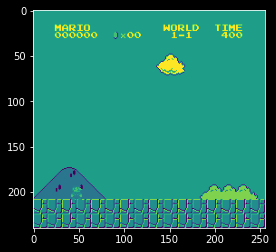

In [6]:
# print(state[0])
plt.imshow(state[0])

# 三、VecFrameStack

![](image/矢量化环境/1646590058323.png)

In [7]:
from stable_baselines3.common.vec_env import VecFrameStack

In [8]:
env = VecFrameStack(env,4,channels_order='last')

In [9]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)


In [ ]:
print(state)

In [ ]:
print(state[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


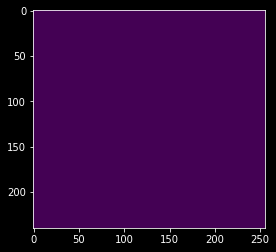

In [11]:
plt.imshow(state[0][:,:,0])
print(state[0][:,:,0])

[[140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 ...
 [214 124 124 ... 124 124   0]
 [214 124 124 ... 124   0   0]
 [124   0   0 ...   0   0 124]]


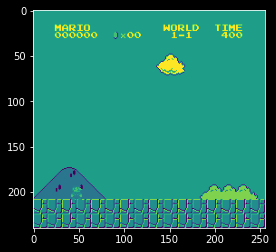

In [12]:
plt.imshow(state[0][:,:,3])
print(state[0][:,:,3])

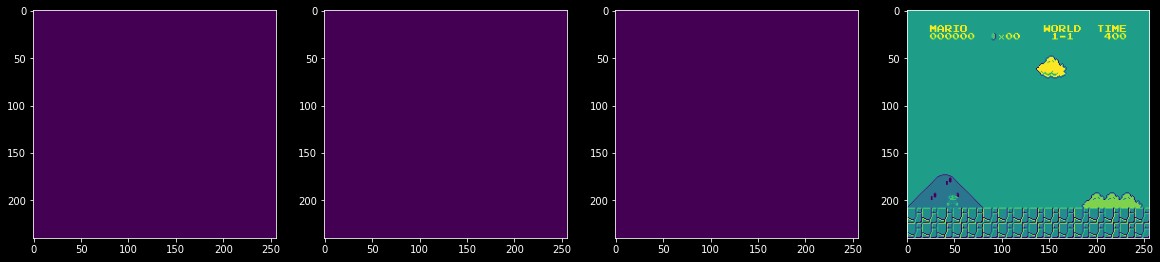

In [13]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [14]:
def show_img_4(state):
    plt.figure(figsize=(20,16))
    for idx in range(state.shape[3]):
        plt.subplot(1,4,idx+1)
        plt.imshow(state[0][:,:,idx])
    plt.show()

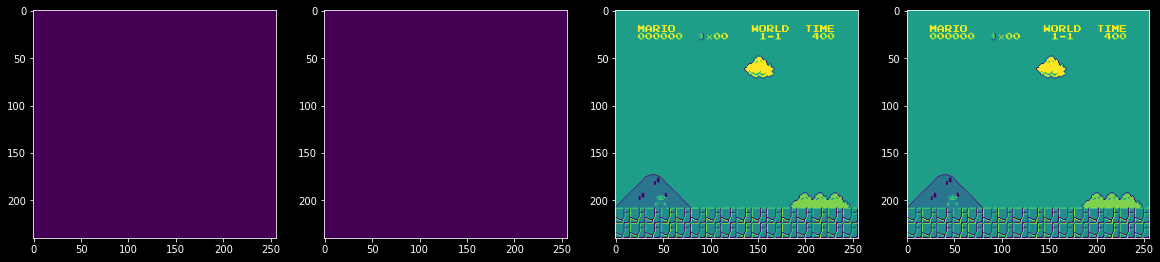

In [15]:
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

# 四、Monitor

In [16]:
from stable_baselines3.common.monitor import Monitor

In [17]:
monitor_dir = r'./monitor_log/'
env = Monitor(env,monitor_dir)

AttributeError: 'DummyVecEnv' object has no attribute 'reward_range'

# 五、整理引入

In [2]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecFrameStack
import os


In [3]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

monitor_dir = r'./monitor_log/'
os.makedirs(monitor_dir,exist_ok=True)
env = Monitor(env,monitor_dir)

env = GrayScaleObservation(env,keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env,4,channels_order='last')



In [4]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)
